In [3]:
import os
import boto3

import xarray as xr
import urllib.request

import matplotlib.pyplot as plt

from botocore import UNSIGNED
from botocore.config import Config

## Available time:
### Start in: 2025-02-10 15:00 UTC
### End in  : 2025-04-30 11:00 UTC

In [4]:
outside_dir = os.path.join('/','home','arturo','Downloads','Blend')

In [5]:
URL_base = 'https://noaa-enterprise-rainrate-pds.s3.amazonaws.com/'

In [7]:
s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
bucket = 'noaa-enterprise-rainrate-pds'

list_files = []
for mm in range(2,5):
    for dd in range(1, 2):#32
        for hh in range(0, 24):#24
            prefix = f'BLEND/RainRate-Blend-INST/2025/{str(mm).zfill(2)}/{str(dd).zfill(2)}/{str(hh).zfill(2)}/'
            response = s3.list_objects_v2(Bucket=bucket, Prefix=prefix)

            if 'Contents' in response:
                for obj in response['Contents']:
                    if obj['Key'].endswith('.nc'):
                        list_files.append(obj['Key'])
            else:
                print("No files found.")

No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.
No files found.


In [8]:
list_files[10:13]

['BLEND/RainRate-Blend-INST/2025/03/01/00/RRQPE-INST-GLB-4_v1r1_blend_s202503010010000_e202503010019599_c202503010022469.nc',
 'BLEND/RainRate-Blend-INST/2025/03/01/00/RRQPE-INST-GLB-4_v1r1_blend_s202503010040000_e202503010049599_c202503010052586.nc',
 'BLEND/RainRate-Blend-INST/2025/03/01/00/RRQPE-INST-GLB-5_v1r1_blend_s202503010000000_e202503010009599_c202503010022434.nc']

In [9]:
for url in list_files[8:14]:
    filename = url.split("/")[-1]

    urllib.request.urlretrieve(URL_base+url, f'{outside_dir}/{filename}')
    try:
        urllib.request.urlretrieve(URL_base+url, f'{outside_dir}/{filename}')
        print(f"{filename}")
    except Exception as e:
        print(f"Error {filename}: {e}")


RRQPE-INST-GLB-3_v1r1_blend_s202503010030000_e202503010039599_c202503010045030.nc
RRQPE-INST-GLB-3_v1r1_blend_s202503010050000_e202503010059599_c202503010104593.nc
RRQPE-INST-GLB-4_v1r1_blend_s202503010010000_e202503010019599_c202503010022469.nc
RRQPE-INST-GLB-4_v1r1_blend_s202503010040000_e202503010049599_c202503010052586.nc
RRQPE-INST-GLB-5_v1r1_blend_s202503010000000_e202503010009599_c202503010022434.nc
RRQPE-INST-GLB-5_v1r1_blend_s202503010010000_e202503010019599_c202503010025046.nc


In [11]:
data_dir = os.path.join(outside_dir,'RRQPE-INST-GLB-3_v1r1_blend_s202503010030000_e202503010039599_c202503010045030.nc')
DATA = xr.open_dataset(data_dir)
DATA

<xarray.Dataset> Size: 936MB
Dimensions:              (Rows: 6501, Columns: 18000)
Dimensions without coordinates: Rows, Columns
Data variables:
    RRQPE                (Rows, Columns) float32 468MB ...
    DQF                  (Rows, Columns) float32 468MB ...
    MonitoringMetaData   int8 1B ...
    quality_information  |S1 1B ...
Attributes: (12/41)
    Conventions:                          CF-1.6
    standard_name_vocabulary:             CF Standard Name Table v76
    project:                              NESDIS Common Cloud Framework
    institution:                          DOC/NOAA/NESDIS/OSPO > Office of Sa...
    naming_authority:                     gov.noaa.nesdis.ncei
    platform:                             GOES-16, GOES-18, Himawari-9, Meteo...
    ...                                   ...
    publisher_name:                       DOC/NOAA/NESDIS/OSPO > Office of Sa...
    publisher_email:                      espcoperations@noaa.gov
    publisher_url:                        http://www.ospo.noaa.gov
    title:                                RRQPE_INST_GLB
    summary:                              Rain Rate produced by NOAA/NESDIS/O...
    source:                               NOAA L2 Rain Rate from ABI, AHI and...

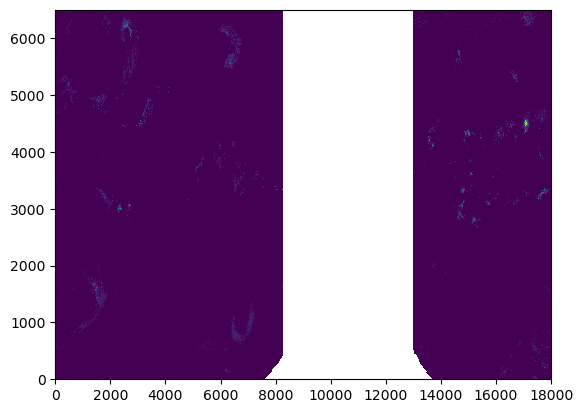

In [100]:
plt.pcolormesh(DATA['RRQPE'].values)